# **SENTIMENT ANALYSIS**

Team members:


*   Prethika GS (21PD08)
*   Krithika L  (21PD19)



In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Exploratory data analysis

In [8]:
data = pd.read_csv("/content/Sentiment Analysis.csv")
data.head()

uniqueID    drugName            condition  \
0      1000       Mobic       Osteoarthritis   
1       111   Meloxicam       Osteoarthritis   
2        11   Orthovisc       Osteoarthritis   
3       111  Infliximab  Psoriatic Arthritis   
4       110    Euflexxa       Osteoarthritis   

                                              review  Sentiment  Unnamed: 5  \
0  "Reduced my pain by 1% and lets me live a norm...          0         NaN   
1  "I have been using Mobic to relieve the pain f...          0         NaN   
2  "This is my third round of orthovisc. My great...          1         NaN   
3  "I have severe psoriatic arthritis and I&#001;...          0         NaN   
4  "After 0 years of astounding results from Supa...          0         NaN   

   Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  
0         NaN         NaN         NaN         NaN  
1         NaN         NaN         NaN         NaN  
2         NaN         NaN         NaN         NaN  
3         NaN         NaN         NaN         NaN  
4         NaN         NaN         NaN         NaN

The last 5 columns are unnecessary so we just drop them.

In [9]:
data = data.drop(['Unnamed: 5', 'Unnamed: 6','Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'], axis=1)
data.head(5)

uniqueID    drugName            condition  \
0      1000       Mobic       Osteoarthritis   
1       111   Meloxicam       Osteoarthritis   
2        11   Orthovisc       Osteoarthritis   
3       111  Infliximab  Psoriatic Arthritis   
4       110    Euflexxa       Osteoarthritis   

                                              review  Sentiment  
0  "Reduced my pain by 1% and lets me live a norm...          0  
1  "I have been using Mobic to relieve the pain f...          0  
2  "This is my third round of orthovisc. My great...          1  
3  "I have severe psoriatic arthritis and I&#001;...          0  
4  "After 0 years of astounding results from Supa...          0

In [10]:
data.isnull().sum()

uniqueID     0
drugName     0
condition    0
review       0
Sentiment    0
dtype: int64

No null values present in the dataset

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25845 entries, 0 to 25844
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   uniqueID   25845 non-null  int64 
 1   drugName   25845 non-null  object
 2   condition  25845 non-null  object
 3   review     25845 non-null  object
 4   Sentiment  25845 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1009.7+ KB


In [12]:
data.duplicated().sum()

180

**180** duplicates are found, hence we must remove them

In [13]:
data = data.drop_duplicates()
data

uniqueID        drugName                              condition  \
0          1000           Mobic                         Osteoarthritis   
1           111       Meloxicam                         Osteoarthritis   
2            11       Orthovisc                         Osteoarthritis   
3           111      Infliximab                    Psoriatic Arthritis   
4           110        Euflexxa                         Osteoarthritis   
...         ...             ...                                    ...   
25823        11  Armour Thyroid  Hypothyroidism, After Thyroid Removal   
25825         0   Levothyroxine  Hypothyroidism, After Thyroid Removal   
25829       111          Forteo                     Hypoparathyroidism   
25834         1   Levothyroxine  Hypothyroidism, After Thyroid Removal   
25836        10   Levothyroxine  Hypothyroidism, After Thyroid Removal   

                                                  review  Sentiment  
0      "Reduced my pain by 1% and lets me live a norm...          0  
1      "I have been using Mobic to relieve the pain f...          0  
2      "This is my third round of orthovisc. My great...          1  
3      "I have severe psoriatic arthritis and I&#001;...          0  
4      "After 0 years of astounding results from Supa...          0  
...                                                  ...        ...  
25823  "Complete Thyroidectemy for cancer and two HUG...          0  
25825  "I have used Levothroid and Synthroid.  I am c...          1  
25829  "I have been on Forteo 0 months now, I started...          0  
25834  "My thyroid disease was caught by my determina...          0  
25836  "Got my thyroid out in November due to cancer....          0  

[25665 rows x 5 columns]

In [14]:
data.shape

(25665, 5)

In [15]:
print (data['condition'].nunique(), "\n")

print ("some of the conditions are : ", data['condition'].unique()[0:10])

40 

some of the conditions are :  ['Osteoarthritis' 'Psoriatic Arthritis' 'Spondyloarthritis'
 'Juvenile Idiopathic Arthritis' 'Gouty Arthritis'
 'Lyme Disease, Arthritis' 'Juvenile Rheumatoid Arthritis'
 'Lewy Body Dementia' 'Dementia' "Alzheimer's Disease"]


There are in total of **40** unique conditions

In [16]:
data.dtypes

uniqueID      int64
drugName     object
condition    object
review       object
Sentiment     int64
dtype: object

In [17]:
data.columns

Index(['uniqueID', 'drugName', 'condition', 'review', 'Sentiment'], dtype='object')

In [18]:
data.columns = data.columns.str.lower()

In [19]:
print("Number of unique values in 'drugName': ",data['drugname'].nunique())
print("Number of unique values in 'drugName': ",data['condition'].nunique())
print("Number of unique values in 'drugName': ",data['review'].nunique())

Number of unique values in 'drugName':  588
Number of unique values in 'drugName':  40
Number of unique values in 'drugName':  14953


In [20]:
data.groupby('condition')['drugname'].nunique().sort_values(ascending=False).head(20)

condition
Depression                               115
Diabetes, Type 0                         102
Osteoarthritis                            82
Bipolar Disorder                          82
Parkinson's Disease                       34
Heart Failure                             31
Breast Cancer, Metastatic                 24
Breast Cancer                             22
Glaucoma, Open Angle                      22
Psoriatic Arthritis                       21
Kidney Infections                         20
Heart Attack                              15
Underactive Thyroid                       13
Hypothyroidism, After Thyroid Removal     13
Juvenile Rheumatoid Arthritis             11
Juvenile Idiopathic Arthritis             10
Alzheimer's Disease                       10
Diabetic Kidney Disease                    9
Gouty Arthritis                            7
Thyroid Cancer                             7
Name: drugname, dtype: int64

In [21]:
#let's check if a single drug is used for multiple conditions
drug_multiple_cond = data.groupby('drugname')['condition'].nunique().sort_values(ascending=False)
print(drug_multiple_cond.head(10))

drugname
Ramipril       4
Altace         3
Trastuzumab    3
Duloxetine     3
Enbrel         3
Remicade       3
Etanercept     3
Femara         3
Cymbalta       3
Prednisone     3
Name: condition, dtype: int64


In [22]:
data.head(30)

uniqueid            drugname            condition  \
0       1000               Mobic       Osteoarthritis   
1        111           Meloxicam       Osteoarthritis   
2         11           Orthovisc       Osteoarthritis   
3        111          Infliximab  Psoriatic Arthritis   
4        110            Euflexxa       Osteoarthritis   
5        101            Remicade    Spondyloarthritis   
6          0   Methyl salicylate       Osteoarthritis   
7        110            Etodolac       Osteoarthritis   
8        111            Celebrex       Osteoarthritis   
9          1            Cataflam       Osteoarthritis   
10      1011          Hyaluronan       Osteoarthritis   
11       101             Limbrel       Osteoarthritis   
12         1          Apremilast  Psoriatic Arthritis   
13      1011          Hyaluronan       Osteoarthritis   
14       101          Hyaluronan       Osteoarthritis   
15       100           Orthovisc       Osteoarthritis   
16       111            Celebrex       Osteoarthritis   
17       101          Diclofenac       Osteoarthritis   
18       110            Euflexxa       Osteoarthritis   
19       111            Remicade  Psoriatic Arthritis   
20      1000          Hyaluronan       Osteoarthritis   
21      1111              Enbrel  Psoriatic Arthritis   
22      1000          Diclofenac       Osteoarthritis   
23         0           Celecoxib       Osteoarthritis   
24         0           Meloxicam       Osteoarthritis   
25       111  Sodium hyaluronate       Osteoarthritis   
26        11              Humira  Psoriatic Arthritis   
27         1         Capzasin-HP       Osteoarthritis   
28       101          Hyaluronan       Osteoarthritis   
29       110  Sodium hyaluronate       Osteoarthritis   

                                               review  sentiment  
0   "Reduced my pain by 1% and lets me live a norm...          0  
1   "I have been using Mobic to relieve the pain f...          0  
2   "This is my third round of orthovisc. My great...          1  
3   "I have severe psoriatic arthritis and I&#001;...          0  
4   "After 0 years of astounding results from Supa...          0  
5   "Saved my\r\r\nLife. I went from level 00 pain...          0  
6   "I have tried heat pads, freeze pads, gels tab...          0  
7   "Etodolac did a great job on my knee pain.  Un...          0  
8   "After breaking both ankles in 0111, I was dia...          1  
9   "Works wonders on lower back pain but sometime...          0  
10                 "Pain in joints,,nausea,abd. Pain"          0  
11  "After 0 0/0 months of using Limbrel I became ...          0  
12  "Been taking Otezla for 0 weeks. The first wee...          1  
13  "Had my third shot today; bi-lateral. I have t...          1  
14  "Not good, it&#001;s been a week since injecti...          0  
15  "Bone Spur with Osteoarthritis and severe pain...          0  
16  "A very good medicine that works for my knee p...          1  
17  "Have been using Pennsaid for over eight years...          0  
18  "Had a Synvisc One shot about 0 years ago and ...          0  
19  "I had my first infusion last week and within ...          0  
20  "I had my first series of three shots in 0000....          1  
21  "I&#001;ve been diagnosed with psoriatic arthr...          0  
22  "I had a bad reaction to this medicine; troubl...          0  
23  "I am a newly diagnosed osteoarthritis suffere...          1  
24  "I have arthritis in my neck from C0 to C1 plu...          0  
25                             "Very expensive 10dls"          0  
26                          "0.0 yrs on this miracle"          0  
27  "I prefer the initial pain of application than...          1  
28  "I just started my second round of Orthovisc. ...          0  
29  "I am 1 years old and both knees are bone on b...          0

In [23]:
data.describe()

uniqueid     sentiment
count  25665.000000  25665.000000
mean     479.056731      0.425560
std     1252.215391      0.494437
min        0.000000      0.000000
25%       11.000000      0.000000
50%      110.000000      0.000000
75%     1000.000000      1.000000
max    11111.000000      1.000000

### Checking for multi-collinearity and plotting Correlation matrix

*   List item
*   List item



In [24]:
data1=data[["uniqueid","drugname","condition","review","sentiment"]]
data1.head()

uniqueid    drugname            condition  \
0      1000       Mobic       Osteoarthritis   
1       111   Meloxicam       Osteoarthritis   
2        11   Orthovisc       Osteoarthritis   
3       111  Infliximab  Psoriatic Arthritis   
4       110    Euflexxa       Osteoarthritis   

                                              review  sentiment  
0  "Reduced my pain by 1% and lets me live a norm...          0  
1  "I have been using Mobic to relieve the pain f...          0  
2  "This is my third round of orthovisc. My great...          1  
3  "I have severe psoriatic arthritis and I&#001;...          0  
4  "After 0 years of astounding results from Supa...          0

In [25]:
data1["drugname"]=pd.factorize(data1.drugname)[0]+1
print(data1.drugname)
data1["condition"]=pd.factorize(data1.condition)[0]+1
print(data1.condition)
data1.drop(["review"],axis=1)

0          1
1          2
2          3
3          4
4          5
        ... 
25823    163
25825    164
25829    588
25834    164
25836    164
Name: drugname, Length: 25665, dtype: int64
0         1
1         1
2         1
3         2
4         1
         ..
25823    15
25825    15
25829    39
25834    15
25836    15
Name: condition, Length: 25665, dtype: int64


uniqueid  drugname  condition  sentiment
0          1000         1          1          0
1           111         2          1          0
2            11         3          1          1
3           111         4          2          0
4           110         5          1          0
...         ...       ...        ...        ...
25823        11       163         15          0
25825         0       164         15          1
25829       111       588         39          0
25834         1       164         15          0
25836        10       164         15          0

[25665 rows x 4 columns]

In [26]:
data1.corr()

<ipython-input-26-73ca661ddaf0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data1.corr()


uniqueid  drugname  condition  sentiment
uniqueid   1.000000  0.036208   0.038007   0.010728
drugname   0.036208  1.000000   0.689523  -0.001141
condition  0.038007  0.689523   1.000000   0.036068
sentiment  0.010728 -0.001141   0.036068   1.000000

In [27]:
import seaborn as sns

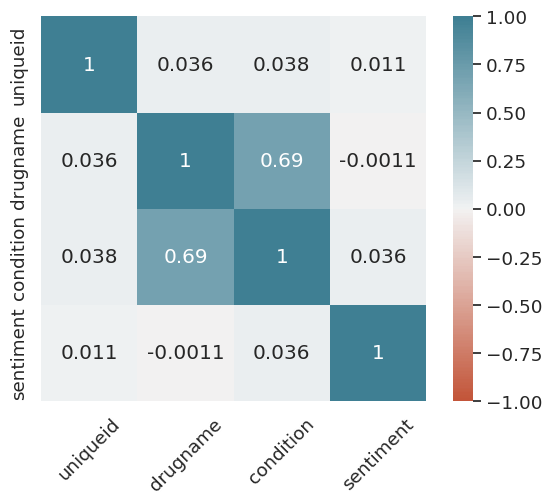

In [28]:
plt.rcParams['figure.figsize'] = [7,5]
sns.set(font_scale = 1.2)
corr = data1.select_dtypes(include = 'int64').corr()
sns_heat = sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(20, 220, n=200), square=True);
plt.setp(sns_heat.get_xticklabels(), rotation = 45);

**INFERENCE**


*   The diagonal values are all 1 which indicates that each variable is perfectly correlated with itself.
*   The off-diagonal values are closer to 0 indicating weak or no correlation.



### Data Visualization

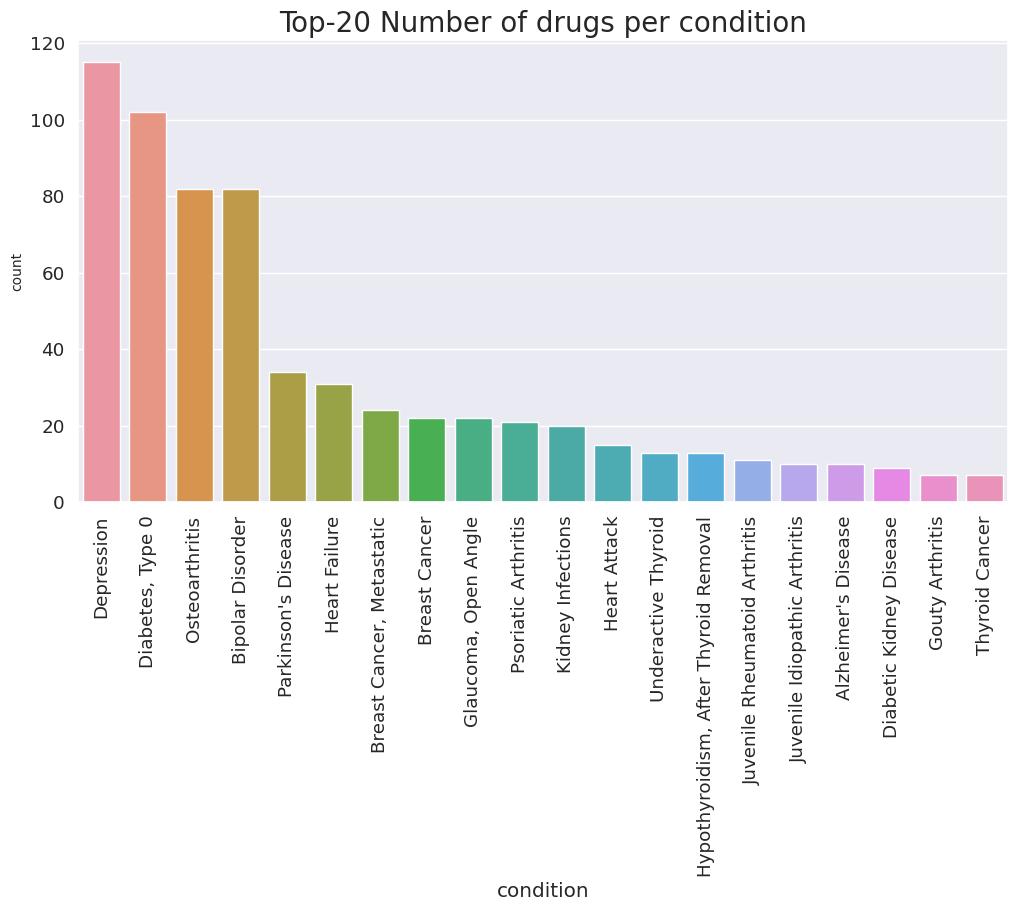

In [29]:
conditions_gp = data.groupby('condition')['drugname'].nunique().sort_values(ascending=False)

#plot the top 20
# Setting the Parameter
condition_gp_top_20 = conditions_gp.head(20)
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [12, 6]
sns.barplot(x = condition_gp_top_20.index, y = condition_gp_top_20.values)
plt.title('Top-20 Number of drugs per condition',fontsize=20)
plt.xticks(rotation=90)
plt.ylabel('count',fontsize=10)
plt.show()

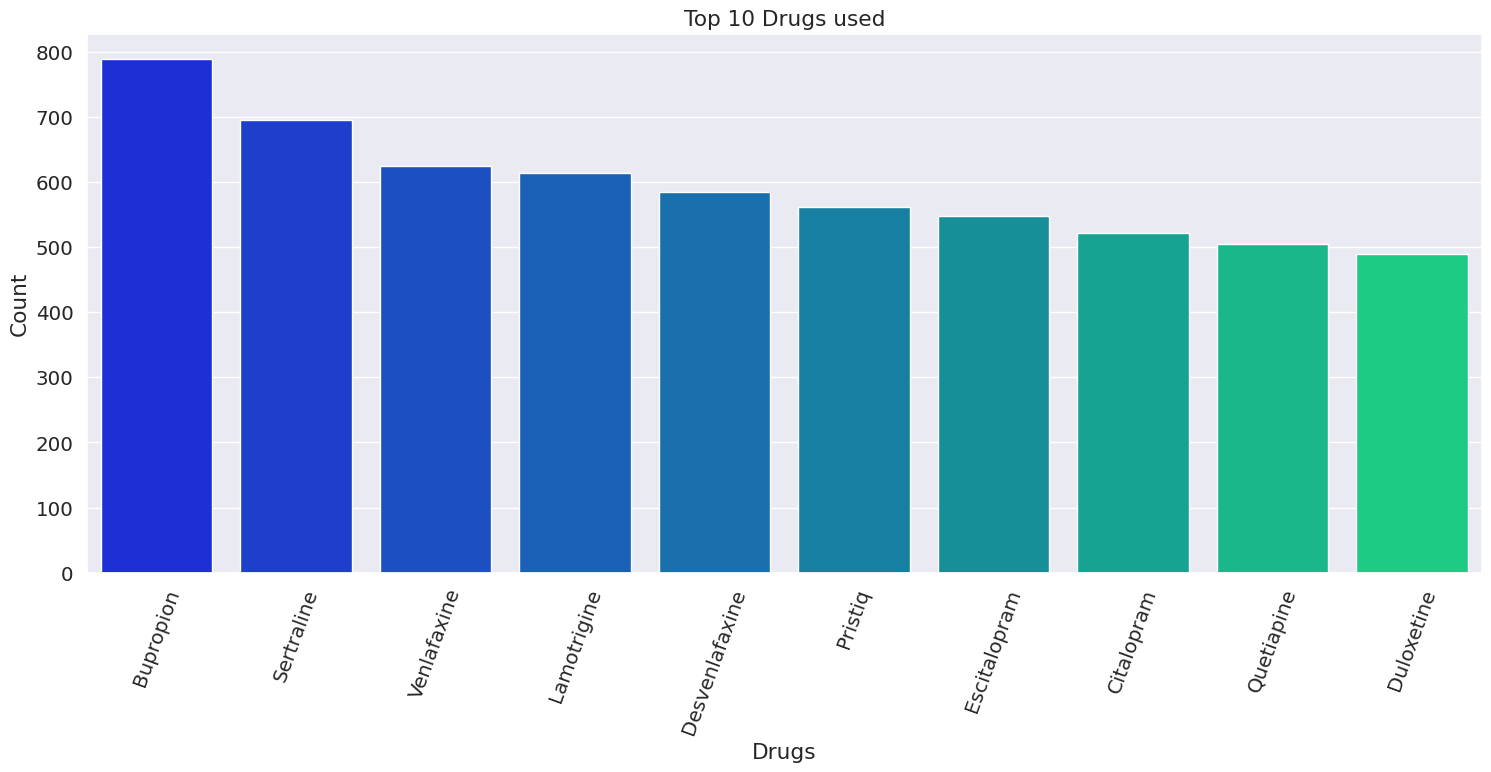

In [30]:
drug = dict(data['drugname'].value_counts())
top_condition = list(drug.keys())[0:10]
values = list(drug.values())[0:10]
sns.set(style = 'darkgrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [18, 7]

sns_ = sns.barplot(x = top_condition, y = values, palette = 'winter')
plt.xticks(rotation=70)
sns_.set_title("Top 10 Drugs used")
sns_.set_xlabel("Drugs")
sns_.set_ylabel("Count");

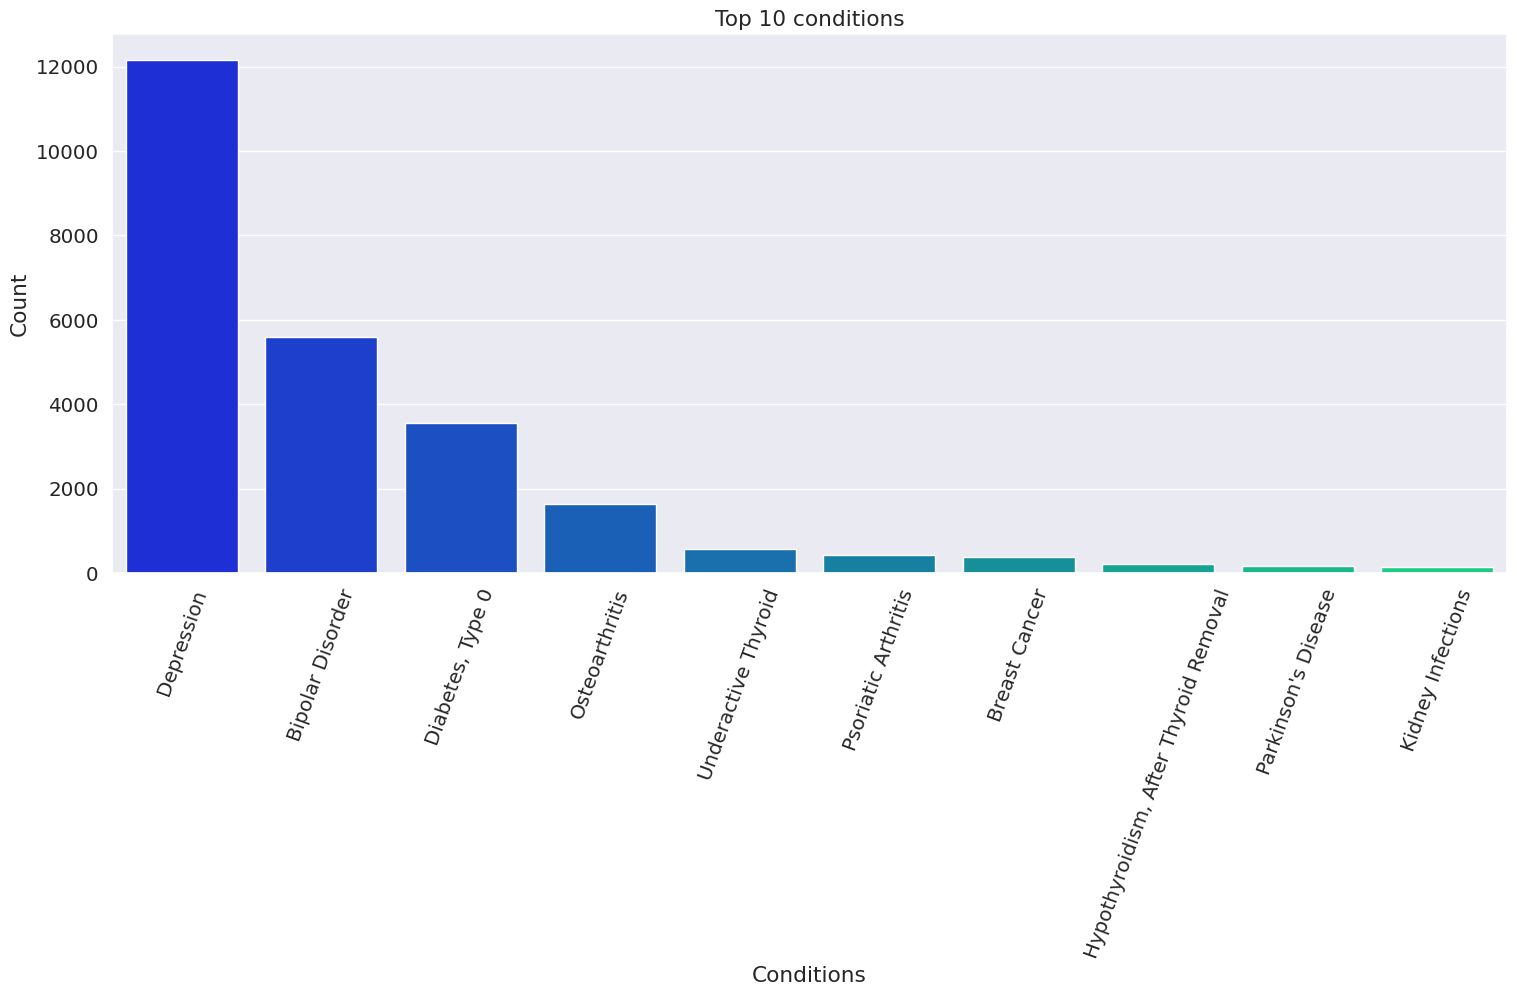

In [31]:
cond = dict(data['condition'].value_counts())
top_condition = list(cond.keys())[0:10]
values = list(cond.values())[0:10]
sns.set(style = 'darkgrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [18, 7]

sns_ = sns.barplot(x = top_condition, y = values, palette = 'winter')
plt.xticks(rotation=70)
sns_.set_title("Top 10 conditions")
sns_.set_xlabel("Conditions")
sns_.set_ylabel("Count");

As the top condition diagnosed is ***depression***, we will plot a graph to visualize the top drugs used for this condition

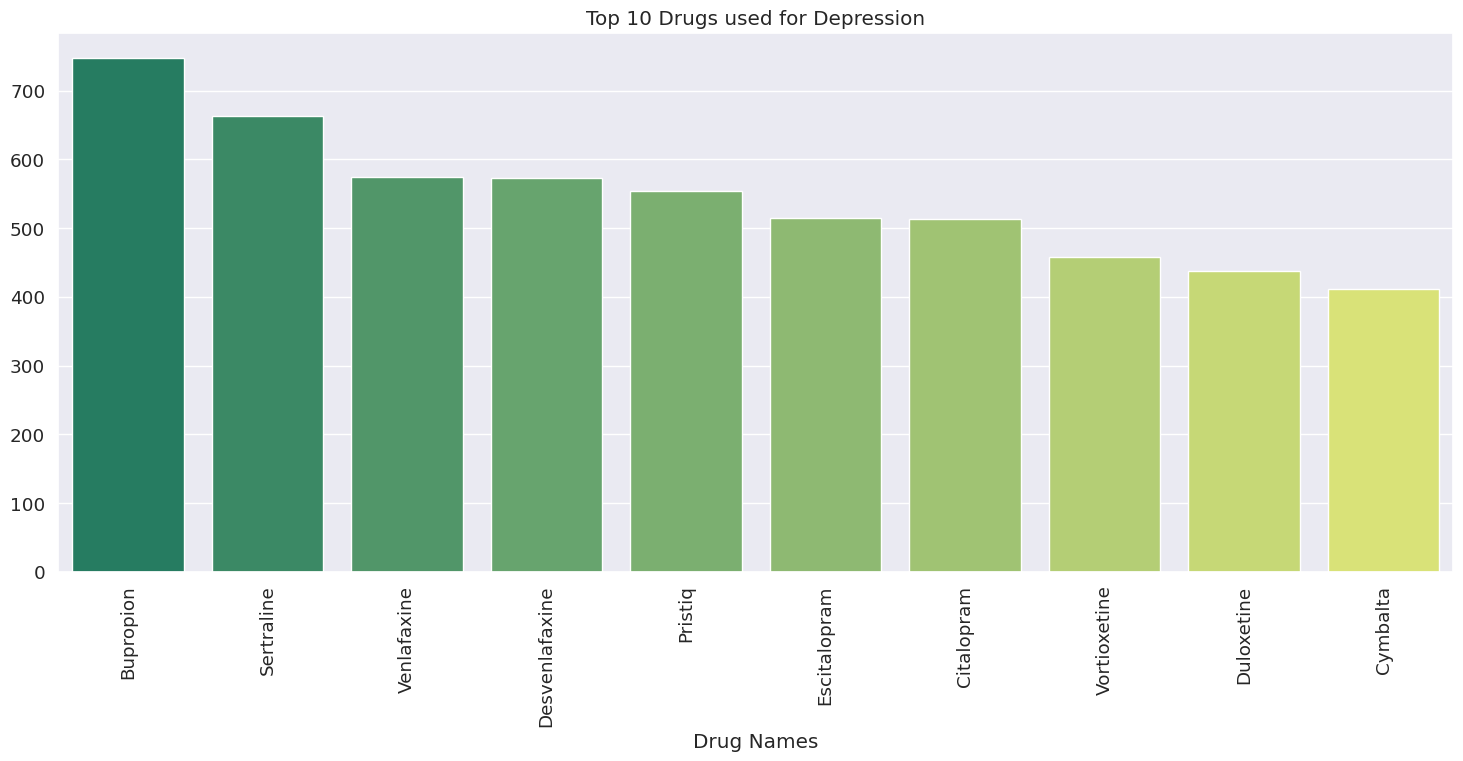

In [32]:
df = data[data['condition'] == 'Depression']['drugname'].value_counts()[0: 10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df.index, y = df.values, palette = 'summer')
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Drugs used for Depression")
plt.setp(sns_.get_xticklabels(), rotation = 90);

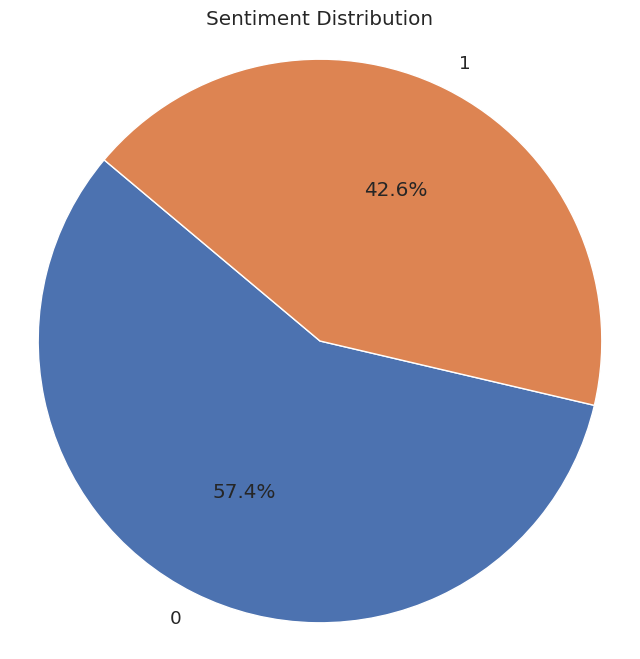

In [33]:
# Count the occurrences of each sentiment value
sentiment_counts = data['sentiment'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle.

# Display the pie chart
plt.show()

[Text(0.5, 1.0, 'Histoplot for Sentiments')]

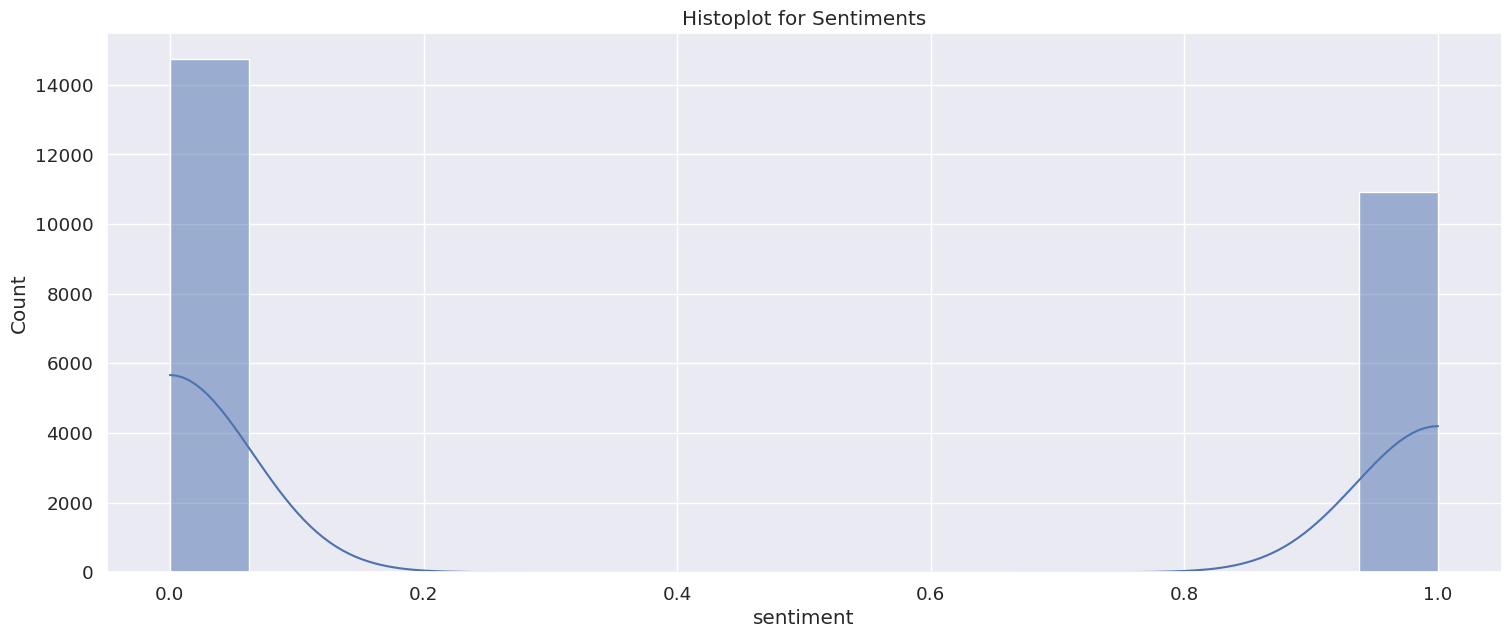

In [34]:
sns.histplot(data['sentiment'], kde=True).set(title="Histoplot for Sentiments")


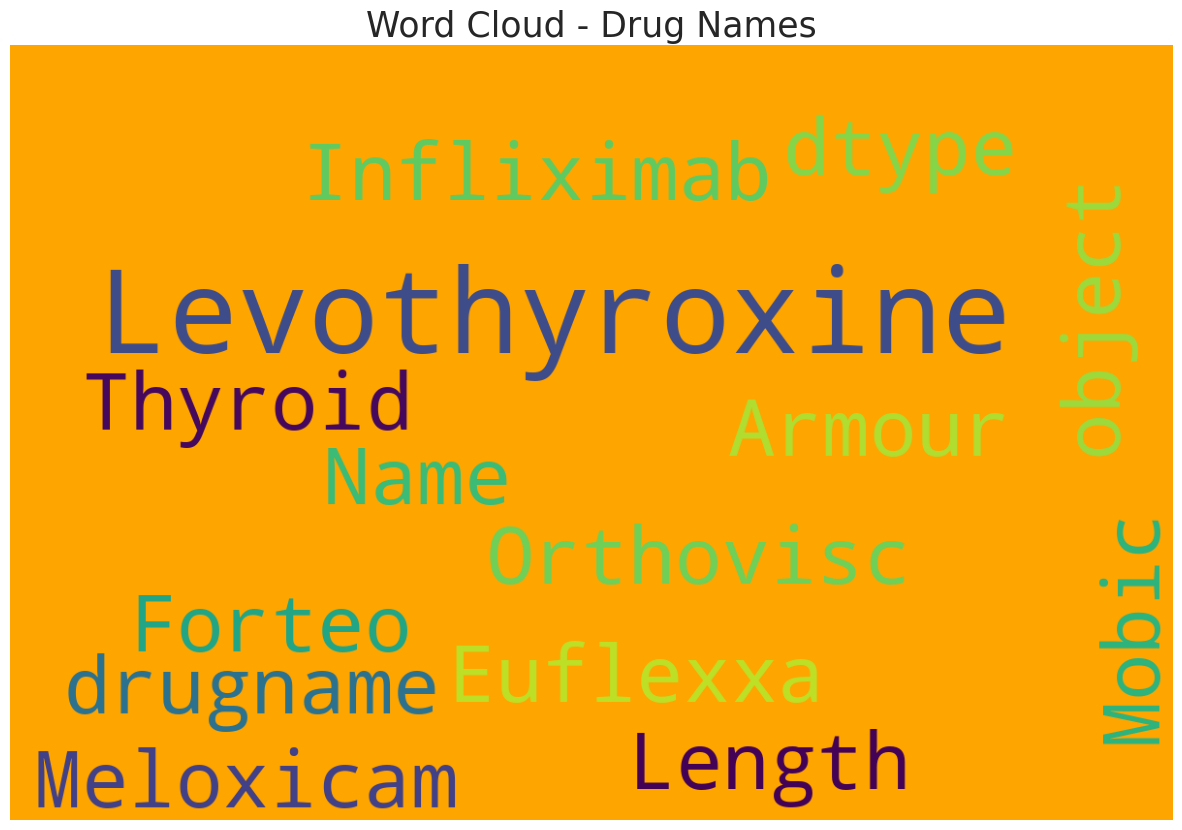

In [35]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'orange', stopwords = stopwords, width = 1200, height = 800).generate(str(data['drugname']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud - Drug Names', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()



## Word cloud Before preprocessing

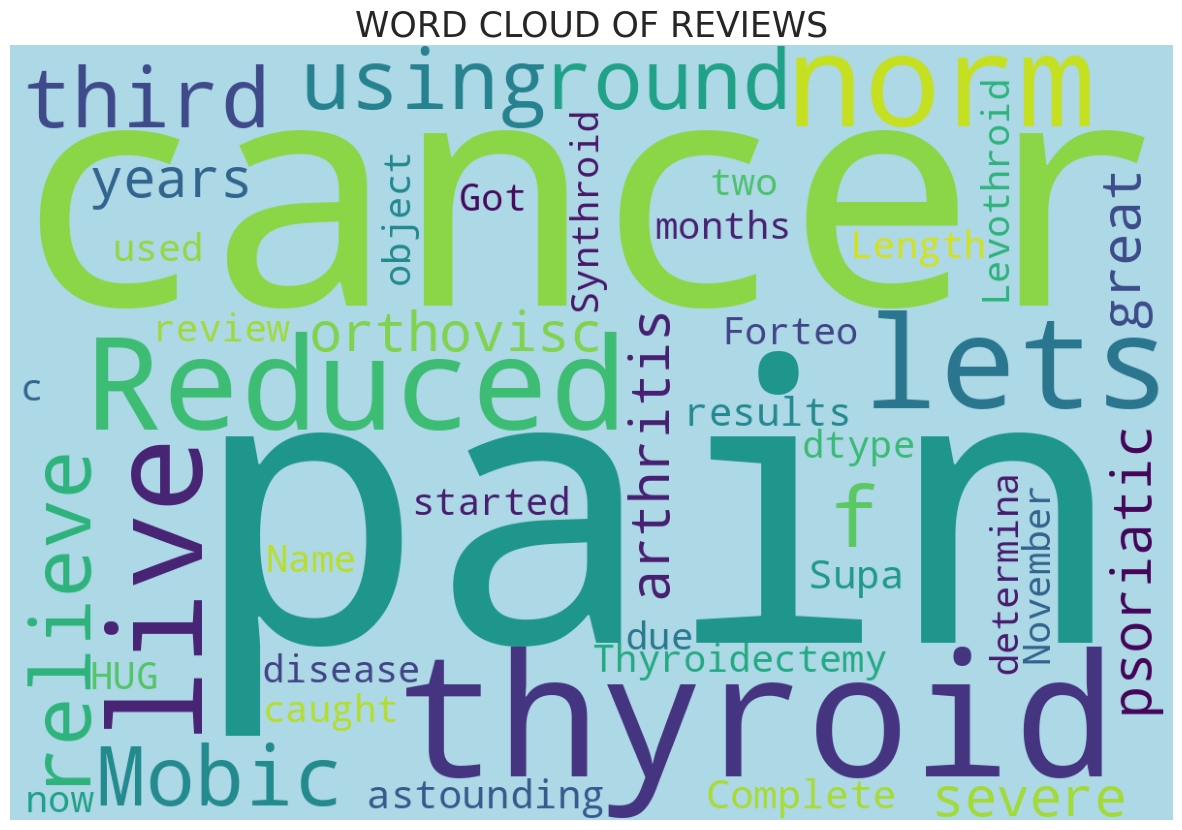

In [36]:
# let's see the words cloud for the reviews

# most popular drugs

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'lightblue', stopwords = stopwords, width = 1200, height = 800).generate(str(data['review']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('WORD CLOUD OF REVIEWS', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

# Preprocessing using NLTK

In [37]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
import re


# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

The main steps for pre-processing using **NLTK** are:


*   Tokenize the text.
*   Remove stopwords

*   Lemmatize the words
*   Clean the text (remove special characters and extra whitespaces)





In [38]:
# Preprocess the text
def preprocess_text(text):
    # Tokenization
    tokens = nltk.word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    cleaned_text = ' '.join([re.sub(r'[^a-zA-Z]', '', word) for word in lemmatized_tokens if len(word) > 1])

    return cleaned_text

data['preprocessed_text'] = data['review'].apply(preprocess_text)



In [39]:
data.head(5)

uniqueid    drugname            condition  \
0      1000       Mobic       Osteoarthritis   
1       111   Meloxicam       Osteoarthritis   
2        11   Orthovisc       Osteoarthritis   
3       111  Infliximab  Psoriatic Arthritis   
4       110    Euflexxa       Osteoarthritis   

                                              review  sentiment  \
0  "Reduced my pain by 1% and lets me live a norm...          0   
1  "I have been using Mobic to relieve the pain f...          0   
2  "This is my third round of orthovisc. My great...          1   
3  "I have severe psoriatic arthritis and I&#001;...          0   
4  "After 0 years of astounding results from Supa...          0   

                                   preprocessed_text  
0                 Reduced pain let live normal life   
1   using Mobic relieve pain Spinal Fusion March ...  
2   third round orthovisc great fear pain injecti...  
3   severe psoriatic arthritis  since   remicade ...  
4   year astounding result Supartz miss injection...

In [40]:
# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each review
data['sentiment_score'] = data['preprocessed_text'].apply(lambda x: sia.polarity_scores(x)['compound'])
print(data[['uniqueid', 'drugname', 'condition', 'review', 'sentiment_score']])


       uniqueid        drugname                              condition  \
0          1000           Mobic                         Osteoarthritis   
1           111       Meloxicam                         Osteoarthritis   
2            11       Orthovisc                         Osteoarthritis   
3           111      Infliximab                    Psoriatic Arthritis   
4           110        Euflexxa                         Osteoarthritis   
...         ...             ...                                    ...   
25823        11  Armour Thyroid  Hypothyroidism, After Thyroid Removal   
25825         0   Levothyroxine  Hypothyroidism, After Thyroid Removal   
25829       111          Forteo                     Hypoparathyroidism   
25834         1   Levothyroxine  Hypothyroidism, After Thyroid Removal   
25836        10   Levothyroxine  Hypothyroidism, After Thyroid Removal   

                                                  review  sentiment_score  
0      "Reduced my pain by 1% and l

Here we use a pre-trained model used for sentiment analysis called **SentimentIntensityAnalyzer** which is used to calculate the sentiment score of each review, indicating the positivity or negativity of the text.

In [41]:
data.head()

uniqueid    drugname            condition  \
0      1000       Mobic       Osteoarthritis   
1       111   Meloxicam       Osteoarthritis   
2        11   Orthovisc       Osteoarthritis   
3       111  Infliximab  Psoriatic Arthritis   
4       110    Euflexxa       Osteoarthritis   

                                              review  sentiment  \
0  "Reduced my pain by 1% and lets me live a norm...          0   
1  "I have been using Mobic to relieve the pain f...          0   
2  "This is my third round of orthovisc. My great...          1   
3  "I have severe psoriatic arthritis and I&#001;...          0   
4  "After 0 years of astounding results from Supa...          0   

                                   preprocessed_text  sentiment_score  
0                 Reduced pain let live normal life           -0.5106  
1   using Mobic relieve pain Spinal Fusion March ...           0.2732  
2   third round orthovisc great fear pain injecti...           0.6705  
3   severe psoriatic arthritis  since   remicade ...          -0.1389  
4   year astounding result Supartz miss injection...           0.4033

In [42]:
data.isna().sum()

uniqueid             0
drugname             0
condition            0
review               0
sentiment            0
preprocessed_text    0
sentiment_score      0
dtype: int64

In [43]:
text_to_find = 'NAType'

# Create a boolean mask to identify rows containing the text
mask = data['preprocessed_text'].str.contains(text_to_find)

# Filter and remove rows with the specified text
data = data[~mask]

# Print the updated DataFrame
print(data)

       uniqueid        drugname                              condition  \
0          1000           Mobic                         Osteoarthritis   
1           111       Meloxicam                         Osteoarthritis   
2            11       Orthovisc                         Osteoarthritis   
3           111      Infliximab                    Psoriatic Arthritis   
4           110        Euflexxa                         Osteoarthritis   
...         ...             ...                                    ...   
25823        11  Armour Thyroid  Hypothyroidism, After Thyroid Removal   
25825         0   Levothyroxine  Hypothyroidism, After Thyroid Removal   
25829       111          Forteo                     Hypoparathyroidism   
25834         1   Levothyroxine  Hypothyroidism, After Thyroid Removal   
25836        10   Levothyroxine  Hypothyroidism, After Thyroid Removal   

                                                  review  sentiment  \
0      "Reduced my pain by 1% and lets m

In [44]:
data2 = data

In [45]:
data2 = data.to_csv('pre_processed_SA.csv', index=False)

In [46]:
data2 = pd.read_csv('/content/pre_processed_SA.csv')
data2.head()
data2.shape

(25665, 7)

In [ ]:
data2.isna().sum()

uniqueid             0
drugname             0
condition            0
review               0
sentiment            0
preprocessed_text    0
sentiment_score      0
dtype: int64

In [ ]:
data2 = data2.dropna(subset=['preprocessed_text'])

## Bag of words (BOW)

**Why do we use BoW?**


*   BoW provides a way to convert the textual information into a format that can be used for modeling as machine learning algorithms, including most classifiers and regressors, require numerical input data.

*  BoW reduces the dimensionality of the data.







In [ ]:
# Import the necessary libraries
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer to create a BoW representation
vectorizer = CountVectorizer()

# Fit the vectorizer on the review text data and transform it into BoW
X_bow = vectorizer.fit_transform(data['preprocessed_text'])

# Convert the BoW matrix to a DataFrame for better readability
bow_df = pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names_out())

# Add the uniqueID column back to the BoW DataFrame
bow_df['uniqueID'] = data['uniqueid']

# Display the DataFrame with the BoW representation
print(bow_df)


       aa  aaf  aaps  aarp  ab  abandon  abandoned  abate  abated  abating  \
0       0    0     0     0   0        0          0      0       0        0   
1       0    0     0     0   0        0          0      0       0        0   
2       0    0     0     0   0        0          0      0       0        0   
3       0    0     0     0   0        0          0      0       0        0   
4       0    0     0     0   0        0          0      0       0        0   
...    ..  ...   ...   ...  ..      ...        ...    ...     ...      ...   
25660   0    0     0     0   0        0          0      0       0        0   
25661   0    0     0     0   0        0          0      0       0        0   
25662   0    0     0     0   0        0          0      0       0        0   
25663   0    0     0     0   0        0          0      0       0        0   
25664   0    0     0     0   0        0          0      0       0        0   

       ...  zyban  zydis  zydus  zypexa  zyprexa  zyprexai  zyp

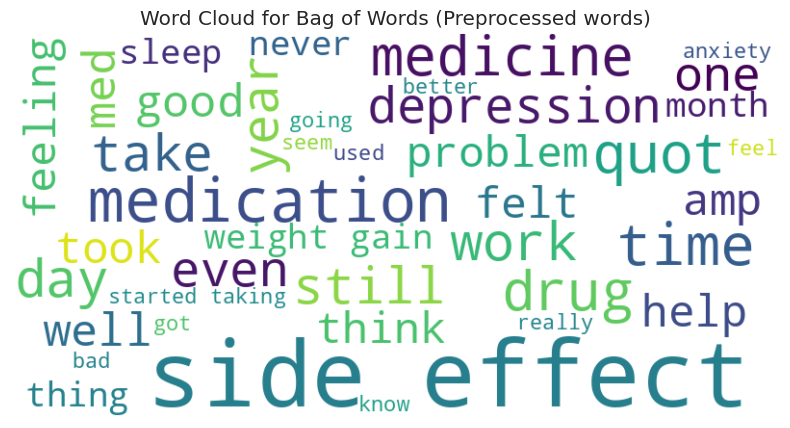

In [ ]:
corpus = ' '.join(data['preprocessed_text'])

# Create a word cloud object
wordcloud = WordCloud(width=800, height=400, max_words=40, background_color='white').generate(corpus)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Bag of Words (Preprocessed words)')
plt.axis('off')
plt.show()

## Term Frequency-Inverse Document Frequency (TF - IDF)

***Term Frequency (TF)***: This measures how frequently a term occurs in a document.
TF(t, d) = Number of times term t appears in document d

***Inverse Document Frequency (IDF)***: This measures how important a term is across the entire corpus.
DF(t) = log(N / (df(t) + 1))


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the 'preprocessed_text' column into TF-IDF vectors
tfidf_matrix = tfidf_vectorizer.fit_transform(data['preprocessed_text'])

# Create a DataFrame to store the TF-IDF values
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the TF-IDF DataFrame
print(tfidf_df)

        aa  aaf  aaps  aarp   ab  abandon  abandoned  abate  abated  abating  \
0      0.0  0.0   0.0   0.0  0.0      0.0        0.0    0.0     0.0      0.0   
1      0.0  0.0   0.0   0.0  0.0      0.0        0.0    0.0     0.0      0.0   
2      0.0  0.0   0.0   0.0  0.0      0.0        0.0    0.0     0.0      0.0   
3      0.0  0.0   0.0   0.0  0.0      0.0        0.0    0.0     0.0      0.0   
4      0.0  0.0   0.0   0.0  0.0      0.0        0.0    0.0     0.0      0.0   
...    ...  ...   ...   ...  ...      ...        ...    ...     ...      ...   
25660  0.0  0.0   0.0   0.0  0.0      0.0        0.0    0.0     0.0      0.0   
25661  0.0  0.0   0.0   0.0  0.0      0.0        0.0    0.0     0.0      0.0   
25662  0.0  0.0   0.0   0.0  0.0      0.0        0.0    0.0     0.0      0.0   
25663  0.0  0.0   0.0   0.0  0.0      0.0        0.0    0.0     0.0      0.0   
25664  0.0  0.0   0.0   0.0  0.0      0.0        0.0    0.0     0.0      0.0   

       ...  zumba  zyban  zydis  zydus 

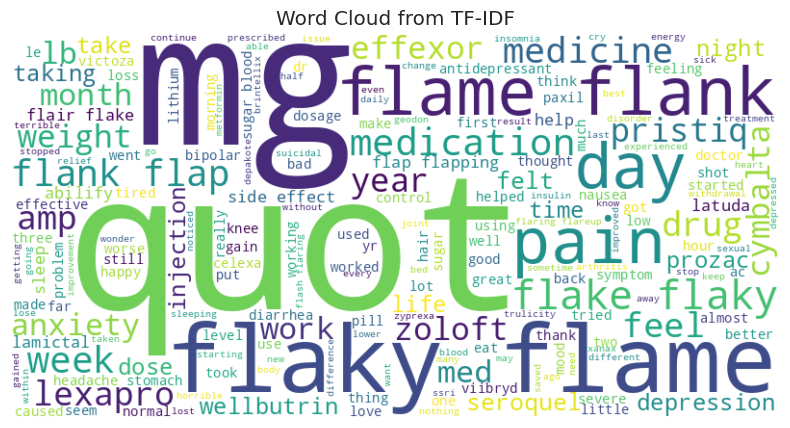

In [ ]:
# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the 'review' column into TF-IDF vectors
tfidf_matrix = tfidf_vectorizer.fit_transform(data['preprocessed_text'])

# Get feature names (words) from the TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Select the top N words based on TF-IDF scores
top_n_words = 10  # You can adjust this number as needed
selected_words = []
for row in tfidf_matrix:
    row_data = row.toarray()[0]
    top_indices = row_data.argsort()[-top_n_words:][::-1]  # Get indices of top N TF-IDF scores
    selected_words.extend([feature_names[i] for i in top_indices])

# Combine the selected words into a single string
selected_words_text = ' '.join(selected_words)

# Create a word cloud from the selected words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(selected_words_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud from TF-IDF')
plt.axis('off')
plt.show()

# Machine learning algorithms

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import re
from sklearn.svm import SVC
import pickle

In [ ]:
data['preprocessed_text'] = data['preprocessed_text'].astype('string')
X = data["preprocessed_text"]  # Features
y = data['sentiment']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train)
# Vectorize the text data using CountVectorizer (binary=True)
vectorizer = CountVectorizer(binary=True)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

1144                          Injections every month year 
19340     given since major depression August March art...
19634     take  mg maximum recommended dosage Zoloft he...
4631      recently got life back finally diagnosed Bipo...
10633      Type diabetic  year recently within past mon...
                               ...                        
21581     doctor prescribed citalopram  mg back depress...
5391      Great medicine cyclothymiarapid cycling ever ...
860       Suffering severe pain shoulder elbow base rig...
15800     day Cymbalta  awful  sleep last night felt ti...
23660     depression age   used SSRI  Welbutrin Effexor...
Name: preprocessed_text, Length: 20532, dtype: string


## Function for calculating Accuracy measures

In [ ]:
def accuracyMeasures(y_test,y_pred):
  # Calculate accuracy
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy:", accuracy)

  # Calculate precision
  precision = precision_score(y_test, y_pred)
  print("Precision:", precision)

  # Calculate recall
  recall = recall_score(y_test, y_pred)
  print("Recall:", recall)

  # Calculate F1-score
  f1 = f1_score(y_test, y_pred)
  print("F1-score:", f1)

  # Calculate and display the confusion matrix
  conf_matrix = confusion_matrix(y_test, y_pred)
  print("Confusion Matrix:")
  print(conf_matrix)

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

x = tfidf_matrix
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
k = 5 # You can choose an appropriate value for k
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
y_pred = knn_classifier.predict(X_test)

In [ ]:
accuracyMeasures(y_test,y_pred)

Accuracy: 0.6185466588739529
Precision: 0.5561031084154663
Recall: 0.6508429458740018
F1-score: 0.5997547015535569
Confusion Matrix:
[[1708 1171]
 [ 787 1467]]


In [ ]:
pickle.dump(knn_classifier,open('knn_model.pk1','wb'))

In [ ]:
knn_model = pickle.load(open('knn_model.pk1','rb'))
print(knn_model)

KNeighborsClassifier()


## Naive bayes classifier

In [ ]:
# Train a Bernoulli Naive Bayes classifier
bernoulli_nb_classifier = BernoulliNB()
bernoulli_nb_classifier.fit(X_train_vec, y_train)

# Make predictions on the test set
y_pred = bernoulli_nb_classifier.predict(X_test_vec)

accuracyMeasures(y_test,y_pred)

Accuracy: 0.7023183323592441
Precision: 0.6842639593908629
Recall: 0.5980479148181012
F1-score: 0.6382575757575758
Confusion Matrix:
[[2257  622]
 [ 906 1348]]


In [ ]:
pickle.dump(bernoulli_nb_classifier,open('nb_model.pk1','wb'))

In [ ]:
bernoulli_nb_classifier = pickle.load(open('nb_model.pk1','rb'))
print(bernoulli_nb_classifier)

BernoulliNB()


## Support Vector machine

In [ ]:
data['preprocessed_text'] = data['preprocessed_text'].astype('string')
X = data["preprocessed_text"]  # Features
y = data['sentiment']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming X_train and X_test are lists or arrays of text data
# X_train and X_test should contain your text data as a list of strings

# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(lowercase=True)  # Set lowercase=True to convert text to lowercase
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


### Kernel - Linear

In [ ]:
# # Train an SVM classifier
svm_classifier_lin = SVC(kernel='linear')  # Linear kernel for text data
svm_classifier_lin.fit(X_train_tfidf, y_train)

# # Make predictions on the test set
y_pred_lin = svm_classifier_lin.predict(X_test_tfidf)


# #printing accuracy measures
print("Linear model accuracy measures")
accuracyMeasures(y_test,y_pred_lin)


Linear model accuracy measures
Accuracy: 0.7241379310344828
Precision: 0.7184567257559958
Recall: 0.611357586512866
F1-score: 0.6605944391179291
Confusion Matrix:
[[2339  540]
 [ 876 1378]]


In [ ]:
pickle.dump(svm_classifier_lin,open('svm_lin.pk1','wb'))

In [ ]:
svm_classifier_lin = pickle.load(open('svm_lin.pk1','rb'))
print(svm_classifier_lin)

SVC(kernel='linear')


### Kernel - Polynomial

In [ ]:
svm_classifier_poly = SVC(kernel='poly',degree=2)
svm_classifier_poly.fit(X_train_tfidf, y_train)
y_pred_poly = svm_classifier_poly.predict(X_test_tfidf)
print("Polynomial model accuracy measures")
accuracyMeasures(y_test,y_pred_poly)

Polynomial model accuracy measures
Accuracy: 0.8723943113189168
Precision: 0.8944252590034534
Recall: 0.8043478260869565
F1-score: 0.8469983648680215
Confusion Matrix:
[[2665  214]
 [ 441 1813]]


In [ ]:
pickle.dump(svm_classifier_poly,open('svm_poly.pk1','wb'))

In [ ]:
svm_classifier_poly = pickle.load(open('svm_poly.pk1','rb'))
print(svm_classifier_poly)

SVC(degree=2, kernel='poly')


### Kernel - Sigmoid

In [ ]:
svm_classifier_sig = SVC(kernel='sigmoid')
svm_classifier_sig.fit(X_train_tfidf, y_train)
y_pred_sig = svm_classifier_sig.predict(X_test_tfidf)
print("Sigmoid model accuracy measures")
accuracyMeasures(y_test,y_pred_sig)

KeyboardInterrupt: ignored

In [ ]:
pickle.dump(svm_classifier_sig,open('svm_sig.pk1','wb'))


In [ ]:
svm_classifier_sig = pickle.load(open('svm_sig.pk1','rb'))
print(svm_classifier_sig)

## Logistic Regression

In [ ]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
# Train a logistic regression classifier
logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = logistic_classifier.predict(X_test_tfidf)

accuracyMeasures(y_test,y_pred)

Accuracy: 0.7048509643483343
Precision: 0.705849582172702
Recall: 0.562111801242236
F1-score: 0.625833539145468
Confusion Matrix:
[[2351  528]
 [ 987 1267]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
pickle.dump(logistic_classifier,open('logreg_model.pk1','wb'))

In [ ]:
logistic_classifier = pickle.load(open('logreg_model.pk1','rb'))
print(logistic_classifier)

LogisticRegression()


In [ ]:
def prediction(user_input):
  user_input_tokens = user_input.lower().split()

  # Load the TF-IDF vectorizer and transform the user input
  tfidf_vectorizer = TfidfVectorizer()
  X_tfidf = tfidf_vectorizer.fit_transform(data['preprocessed_text'])
  user_input_tfidf = tfidf_vectorizer.transform([' '.join(user_input_tokens)])

  # Load the logistic regression model (use the trained model)
  model = LogisticRegression()
  model.fit(X_tfidf, data['sentiment'])
  print(user_input_tfidf)
  # Make a prediction on the user input
  user_input_prediction = model.predict(user_input_tfidf)
  print(user_input_prediction)
  # Interpret the prediction
  if user_input_prediction[0] == 0:
      sentiment = "negative"
  else:
      sentiment = "positive"

  print(f"The sentiment of the user input is {sentiment}.")
user_input1 = "i feel very bad"
user_input2 = "i feel very good"

print(prediction(user_input1))
print(prediction(user_input2))



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  (0, 16641)	0.9280745689465434
  (0, 5694)	0.21707227908837662
  (0, 1319)	0.30258423641370635
[0]
The sentiment of the user input is negative.
None
  (0, 16641)	0.933326209848396
  (0, 6486)	0.2850386434899712
  (0, 5694)	0.21830061320899893
[0]
The sentiment of the user input is negative.
None


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Explainable ML algorithms

## Local Interpretable model-agnostic explanations (LIME)

In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=52c8a3b77967842276c7d5248a6f5a9ce98fe6652f5b666e3dd2a855d4cf1fc2
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import lime
import lime.lime_text
from sklearn.pipeline import make_pipeline

In [ ]:
# Create a LIME Explainer
explainer = lime.lime_text.LimeTextExplainer(class_names=['class_label_0', 'class_label_1'])

In [ ]:
# Select a random test instance
test_instance = X_test.iloc[0]

In [ ]:
pipeline = make_pipeline(tfidf_vectorizer, logistic_classifier)

In [ ]:
# Explain the model's prediction for the selected instance
explanation = explainer.explain_instance(test_instance, pipeline.predict_proba)

# Visualize the explanation
explanation.show_in_notebook()

## Shapley additive explanations (SHAP)

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 7.3 MB/s eta 0:00:00


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


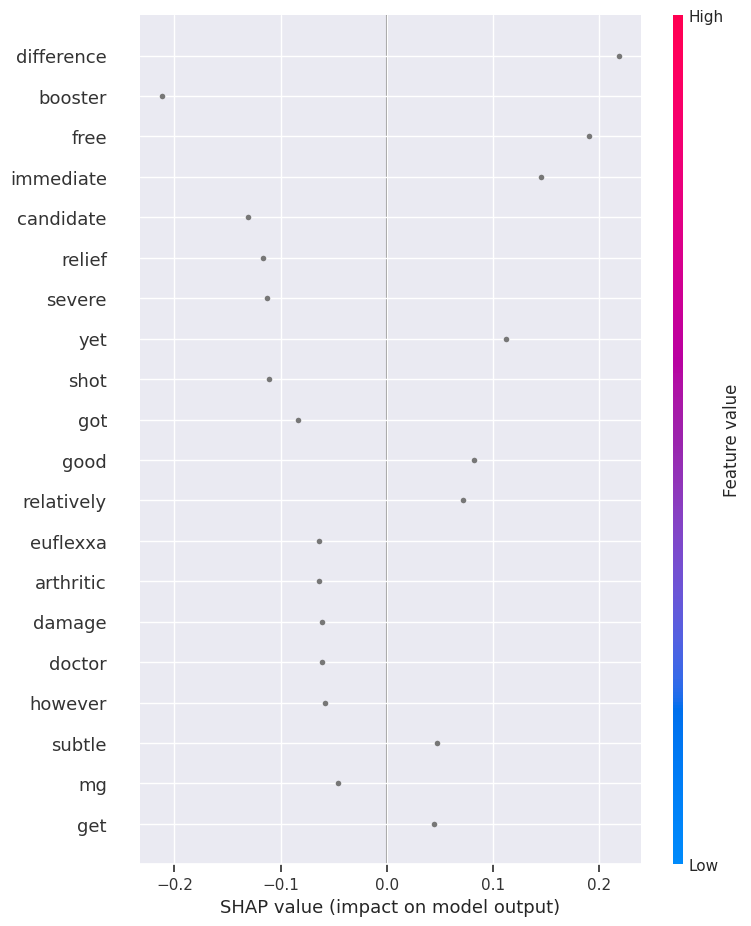

In [ ]:
import shap
# Create a SHAP explainer
explainer = shap.Explainer(logistic_classifier, X_train_tfidf)

# Explain a specific instance (e.g., index 0)
shap_values = explainer(X_test_tfidf[0])

# Plot SHAP values
shap.summary_plot(shap_values, X_test_tfidf[0], feature_names=tfidf_vectorizer.get_feature_names_out())


# User interface

In [ ]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 58.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 97.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.0 MB/s eta 0:00:00


## Works for data - review

In [ ]:
data = pd.read_csv('/content/sentimentAnalysis.csv')
data.head()

uniqueID    drugName            condition  \
0      1000       Mobic       Osteoarthritis   
1       111   Meloxicam       Osteoarthritis   
2        11   Orthovisc       Osteoarthritis   
3       111  Infliximab  Psoriatic Arthritis   
4       110    Euflexxa       Osteoarthritis   

                                              review  Sentiment  Unnamed: 5  \
0  "Reduced my pain by 1% and lets me live a norm...          0         NaN   
1  "I have been using Mobic to relieve the pain f...          0         NaN   
2  "This is my third round of orthovisc. My great...          1         NaN   
3  "I have severe psoriatic arthritis and I&#001;...          0         NaN   
4  "After 0 years of astounding results from Supa...          0         NaN   

   Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  
0         NaN         NaN         NaN         NaN  
1         NaN         NaN         NaN         NaN  
2         NaN         NaN         NaN         NaN  
3         NaN         NaN         NaN         NaN  
4         NaN         NaN         NaN         NaN

In [ ]:
data = data.drop(['Unnamed: 5', 'Unnamed: 6','Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'], axis=1)
data.head(5)

uniqueID    drugName            condition  \
0      1000       Mobic       Osteoarthritis   
1       111   Meloxicam       Osteoarthritis   
2        11   Orthovisc       Osteoarthritis   
3       111  Infliximab  Psoriatic Arthritis   
4       110    Euflexxa       Osteoarthritis   

                                              review  Sentiment  
0  "Reduced my pain by 1% and lets me live a norm...          0  
1  "I have been using Mobic to relieve the pain f...          0  
2  "This is my third round of orthovisc. My great...          1  
3  "I have severe psoriatic arthritis and I&#001;...          0  
4  "After 0 years of astounding results from Supa...          0

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import re
from sklearn.svm import SVC

In [ ]:
data['review'] = data['review'].astype('string')
X = data["review"]  # Features
y = data['Sentiment']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train)
# Vectorize the text data using CountVectorizer (binary=True)
vectorizer = CountVectorizer(binary=True)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

10611    "I started Trulicity last Thursday morning, th...
17407    "Thank God for this drug.  It has helped me im...
20984                           "It didnt seem to help me"
24549    "I have taken a wide selection on antidepressa...
15579    "I&#001;ve been taking Effexor for 0 months no...
                               ...                        
21575    "I began taking Effexor after coming off of Pa...
5390     "I have only been on lamictal for a few months...
860      "Suffering from severe pain in shoulder, elbow...
15795    "I&#001;ve been on Welbutrin for 0 weeks, 000 ...
23654    "I&#001;ve been on 00mg for about 0 months now...
Name: review, Length: 20676, dtype: string


In [ ]:
# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
# Train a logistic regression classifier
logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train_tfidf, y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression()

In [ ]:
data.head()

uniqueID    drugName            condition  \
0      1000       Mobic       Osteoarthritis   
1       111   Meloxicam       Osteoarthritis   
2        11   Orthovisc       Osteoarthritis   
3       111  Infliximab  Psoriatic Arthritis   
4       110    Euflexxa       Osteoarthritis   

                                              review  Sentiment  
0  "Reduced my pain by 1% and lets me live a norm...          0  
1  "I have been using Mobic to relieve the pain f...          0  
2  "This is my third round of orthovisc. My great...          1  
3  "I have severe psoriatic arthritis and I&#001;...          0  
4  "After 0 years of astounding results from Supa...          0

In [ ]:
def prediction(user_input):
  user_input_tokens = user_input.lower().split()

  # Load the TF-IDF vectorizer and transform the user input
  tfidf_vectorizer = TfidfVectorizer()
  X_tfidf = tfidf_vectorizer.fit_transform(data['review'])
  user_input_tfidf = tfidf_vectorizer.transform([' '.join(user_input_tokens)])

  # Load the logistic regression model (use the trained model)
  model = LogisticRegression()
  model.fit(X_tfidf, data['Sentiment'])
  print(user_input_tfidf)
  # Make a prediction on the user input
  user_input_prediction = model.predict(user_input_tfidf)
  print(user_input_prediction)
  # Interpret the prediction
  if user_input_prediction[0] == 0:
      sentiment = "negative"
  else:
      sentiment = "positive"
  return sentiment

In [ ]:
userReview = "i feel good"

In [ ]:
ans = prediction(userReview)

  (0, 6750)	0.7904491636203438
  (0, 5952)	0.6125276481367181
[1]


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
print(ans)

positive


## data2 - preprocessed text

In [ ]:
data2 = pd.read_csv('/content/pre_processed_SA.csv')
data2.head()

uniqueid    drugname            condition  \
0      1000       Mobic       Osteoarthritis   
1       111   Meloxicam       Osteoarthritis   
2        11   Orthovisc       Osteoarthritis   
3       111  Infliximab  Psoriatic Arthritis   
4       110    Euflexxa       Osteoarthritis   

                                              review  sentiment  \
0  "Reduced my pain by 1% and lets me live a norm...          0   
1  "I have been using Mobic to relieve the pain f...          0   
2  "This is my third round of orthovisc. My great...          1   
3  "I have severe psoriatic arthritis and I&#001;...          0   
4  "After 0 years of astounding results from Supa...          0   

                                   preprocessed_text  sentiment_score  
0                 Reduced pain let live normal life           -0.5106  
1   using Mobic relieve pain Spinal Fusion March ...           0.2732  
2   third round orthovisc great fear pain injecti...           0.6705  
3   severe psoriatic arthritis  since   remicade ...          -0.1389  
4   year astounding result Supartz miss injection...           0.4033

In [ ]:
# Create a boolean mask to identify rows with NaN values in the specified column
mask = pd.isna(data2['preprocessed_text'])

# Filter and drop rows with NaN values in the specified column
data2 = data2[~mask]

# Print the updated DataFrame
print(data2.isna().sum())

uniqueid             0
drugname             0
condition            0
review               0
sentiment            0
preprocessed_text    0
sentiment_score      0
dtype: int64


In [ ]:
data2 = data2.to_csv('pre_processed_SA.csv', index=False)

In [ ]:
data2 = pd.read_csv('/content/pre_processed_SA.csv')
data2.head()
print(data2.isna().sum())

uniqueid             0
drugname             0
condition            0
review               0
sentiment            0
preprocessed_text    0
sentiment_score      0
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import re
from sklearn.svm import SVC

In [ ]:
data2['preprocessed_text'] = data2['preprocessed_text'].astype('string')
X = data2["preprocessed_text"]  # Features
y = data2['sentiment']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train)
# Vectorize the text data using CountVectorizer (binary=True)
vectorizer = CountVectorizer(binary=True)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

1144                          Injections every month year 
19335     given since major depression August March art...
19629     take  mg maximum recommended dosage Zoloft he...
4630      recently got life back finally diagnosed Bipo...
10628      Type diabetic  year recently within past mon...
                               ...                        
21575     doctor prescribed citalopram  mg back depress...
5390      Great medicine cyclothymiarapid cycling ever ...
860       Suffering severe pain shoulder elbow base rig...
15795     day Cymbalta  awful  sleep last night felt ti...
23654     depression age   used SSRI  Welbutrin Effexor...
Name: preprocessed_text, Length: 20532, dtype: string


In [ ]:
# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
# Train a logistic regression classifier
logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train_tfidf, y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression()

In [ ]:
def prediction(user_input):
  user_input_tokens = user_input.lower().split()

  # Load the TF-IDF vectorizer and transform the user input
  tfidf_vectorizer = TfidfVectorizer()
  X_tfidf = tfidf_vectorizer.fit_transform(data2['preprocessed_text'])
  user_input_tfidf = tfidf_vectorizer.transform([' '.join(user_input_tokens)])

  # Load the logistic regression model (use the trained model)
  model = LogisticRegression(solver='lbfgs', max_iter=1000)
  model.fit(X_tfidf, data2['sentiment'])
  print(user_input_tfidf)
  # Make a prediction on the user input
  user_input_prediction = model.predict(user_input_tfidf)
  print(user_input_prediction)
  # Interpret the prediction
  if user_input_prediction[0] == 0:
      sentiment = "negative"
  else:
      sentiment = "positive"
  return sentiment

In [ ]:
userReview = "i feel good"

In [ ]:
ans = prediction(userReview)

  (0, 6486)	0.7939142574993701
  (0, 5694)	0.6080297293218678
[1]


In [ ]:
print(ans)

positive


## Streamlit - app.py

In [47]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.0 MB/s eta 0:00:00


In [48]:
%%writefile app.py

import streamlit as st
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import re

data2 = pd.read_csv('/content/pre_processed_SA.csv')
data2.head()




data2['preprocessed_text'] = data2['preprocessed_text'].astype('string')
X = data2["preprocessed_text"]  # Features
y = data2['sentiment']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Vectorize the text data using CountVectorizer (binary=True)
vectorizer = CountVectorizer(binary=True)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

def prediction(user_input):
  user_input_tokens = user_input.lower().split()
  # Load the TF-IDF vectorizer and transform the user input
  tfidf_vectorizer = TfidfVectorizer()
  X_tfidf = tfidf_vectorizer.fit_transform(data2['preprocessed_text'])
  user_input_tfidf = tfidf_vectorizer.transform([' '.join(user_input_tokens)])
  # Load the logistic regression model (use the trained model)
  model = LogisticRegression()
  model.fit(X_tfidf, data2['sentiment'])
  print(user_input_tfidf)
  # Make a prediction on the user input
  user_input_prediction = model.predict(user_input_tfidf)
  print(user_input_prediction)
  # Interpret the prediction
  if user_input_prediction[0] == 0:
      sentiment = "negative"
  else:
      sentiment = "positive"
  return sentiment



# Define functions for different pages
def predictions_page():
    userId = st.text_input("Enter your unique id :")
    userReview = st.text_input("Enter your review :")

    if st.button("Predict"):
        # Code to execute when the button is clicked
        ans = prediction(userReview)
        st.write("You submitted:", ans)

def reviews_page():
    data2 = pd.read_csv('/content/pre_processed_SA.csv')
    selected_drug = st.selectbox("Select a Drug", data2["drugname"].unique())
    selected_condition = st.selectbox("Select a Condition", data2["condition"].unique())
    filtered_df = data2[(data2["drugname"] == selected_drug) & (data2["condition"] == selected_condition)]
    st.table(filtered_df[["review", "sentiment"]])
    positive_reviews = len(filtered_df[filtered_df['sentiment'] == 1])
    negative_reviews = len(filtered_df[filtered_df['sentiment'] == 0])
    st.write(f"Number of Positive Reviews: {positive_reviews}")
    st.write(f"Number of Negative Reviews: {negative_reviews}")

def drugs_page():
    st.title("List of Drugs")
    # Load the dataset
    df = pd.read_csv('/content/pre_processed_SA.csv')

    # Create a text input for entering a disease
    selected_disease = st.selectbox("Select a Condition", df["condition"].unique())
    if(selected_disease!=""):

        # Filter the dataset based on the entered disease
        filtered_df = df[df['condition'].str.lower().str.contains(selected_disease.lower())]

        # Display the list of drugs for the selected disease
        st.title(f"List of Drugs for '{selected_disease}'")
        drugs_for_disease = filtered_df['drugname'].unique()
        st.write(drugs_for_disease)

def medicines_page():
    st.title("List of Conditions")
    # Load the dataset
    df = pd.read_csv('/content/pre_processed_SA.csv')

    # Create a text input for entering a disease
    selected_disease = st.selectbox("Select a Drug", df["drugname"].unique())
    if(selected_disease!=""):

        # Filter the dataset based on the entered disease
        filtered_df = df[df['drugname'].str.lower().str.contains(selected_disease.lower())]

        # Display the list of drugs for the selected disease
        st.title(f"Conditions for which '{selected_disease}' is prescribed ")
        drugs_for_disease = filtered_df['condition'].unique()
        st.write(drugs_for_disease)

# Streamlit app
def main():
    st.title("Drug sentiment analysis")

    # Create a navigation menu
    page = st.radio("Select an option:", ("Reviews", "Predictions", "Drugs","Medicines"))
    if page == "Reviews":
        st.header("Reviews Page")
        reviews_page()

    elif page == "Predictions":
        predictions_page()

    elif page == "Drugs":
        drugs_page()
    elif page == "Medicines":
        medicines_page()


if __name__ == "__main__":
    main()

Writing app.py


In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 4.308s
your url is: https://all-rings-double.loca.lt
^C


In [49]:
!streamlit run app.py &>/content/logs.txt & npx localtunnel --port 8501 & curl ipv4.icanhazip.com

34.106.21.103
npx: installed 22 in 8.286s
your url is: https://bright-cases-brake.loca.lt
